# Tablas Pivote

Hasta ahora hemos visto como 'groupby' nos permite explorar relaciones dentro de un dataset. 
Una tabla pivote es una operación similar, común en programas de tabulación. 
Una tabla pivote toma toma los datos de una columna como input y agrupa las entradas en una tabla de dos dimensiones.
Provee un resumen multidimensional de los datos.

Puede resultar más fácil pensar en las tablas pivote como la versión multidimensional de 'groupby' para evitar confusiones.

En esta sesión también veremos la librería de seaborn para visualización de datos.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('meteorite-landings.csv')
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [28]:
data.fall.unique()

array(['Fell', 'Found'], dtype=object)

Podríamos agrupar nuestros datos de acuerdo a la clase del meteorito de acuerdo a su masa

In [29]:
data.groupby('recclass')[['mass']].mean()

,mass
recclass,
Acapulcoite,490.424407
Acapulcoite/Lodranite,31.793333
Acapulcoite/lodranite,44.933333
Achondrite-prim,1078.000000
Achondrite-ung,895.845614
...,...
Unknown,NaN
Ureilite,490.014900
Ureilite-an,1287.125000


Y luego ordenarlos por su media

In [30]:
data.groupby('recclass')[['mass']].mean().sort_values(by='mass', ascending=False).dropna()

,mass
recclass,
"Iron, IVB",4.322833e+06
"Iron, IIIE",2.076114e+06
"Iron, IAB-MG",1.301547e+06
"Iron, IC",8.925563e+05
Mesosiderite-A1,6.982063e+05
...,...
EH,5.900000e-01
H4(?),4.000000e-01
Fusion crust,7.825000e-02


Y explorar si hay alguna relación con otras variables, como si fue observado o encontrado

In [32]:
data.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [34]:
data.groupby(['recclass', 'fall'])[['mass']].aggregate('mean').unstack()

mass             
fall                      Fell        Found
recclass                                   
Acapulcoite            1914.00   463.564491
Acapulcoite/Lodranite      NaN    31.793333
Acapulcoite/lodranite      NaN    44.933333
Achondrite-prim            NaN  1078.000000
Achondrite-ung            0.15   911.840179
...                        ...          ...
Unknown                    NaN          NaN
Ureilite               1068.80   480.204983
Ureilite-an            3950.00   399.500000
Ureilite-pmict             NaN   262.685652
Winonaite               157.00  1169.513750

[466 rows x 2 columns]

## Tabla pivote

Este es el equivalente de la operación anterior con tablas pivote

In [35]:
data.pivot_table('mass', index='recclass', columns='fall')

fall,Fell,Found
recclass,,
Acapulcoite,1914.00,463.564491
Acapulcoite/Lodranite,NaN,31.793333
Acapulcoite/lodranite,NaN,44.933333
Achondrite-prim,NaN,1078.000000
Achondrite-ung,0.15,911.840179
...,...,...
Stone-ung,NaN,0.630000
Ureilite,1068.80,480.204983
Ureilite-an,3950.00,399.500000


# Tablas pivote multi nivel

Podemos especificar tablas pivote de múltiples niveles, por ejemplo, tal vez nos interesa agrupar nuestra data por una tercera dimensión. Vemos un ejemplo utilizando la función 'cut'

In [36]:
data.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [42]:
data.year.unique()

array([1880., 1951., 1952., 1976., 1902., 1919., 1949., 1814., 1930.,
       1920., 1974., 1925., 1769., 1838., 1959., 1981., 1957., 2001.,
       1806., 1766., 2002., 1835., 1873., 1860., 1900., 1883., 1899.,
       1969., 2008., 1977., 1895., 1898., 1939.,   nan, 1822., 1869.,
       1942., 1971., 1984., 1914., 1803., 1954., 1932., 1950., 1805.,
       2009., 1923., 1886., 1896., 1933., 1945., 1836., 1865., 1842.,
       1858., 1908., 1855., 1968., 1938., 1934., 1929., 1922., 1907.,
       1993., 1871., 1892., 1913., 1790., 1704., 1904., 1910., 1965.,
       2006., 1994., 2012., 1989., 1916., 1893., 1961., 1937., 1798.,
       2004., 1943., 1924., 1811., 1859., 1921., 1877., 1940., 1905.,
       1827., 1887., 1999., 1843., 1796., 1941., 1906., 1909., 1833.,
       1804., 1962., 1808., 1894., 1852., 1812., 1823., 2003., 2011.,
       1847., 1956., 1960., 1964., 2007., 1990., 1946., 1863., 1861.,
       1870., 1991., 1866., 1973., 1846., 1874., 1791., 1848., 1583.,
       1810., 1988.,

In [44]:
data.year.describe()

count    45428.000000
mean      1991.772189
std         27.181247
min        301.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2501.000000
Name: year, dtype: float64

In [54]:
tiempo = pd.cut(data['year'], [1800, 1950, 2000])
data.pivot_table('mass', ['recclass', tiempo], 'fall')

fall                                   Fell         Found
recclass              year                               
Acapulcoite           (1950, 2000]  1914.00    259.906471
Acapulcoite/Lodranite (1950, 2000]      NaN     29.820000
Achondrite-ung        (1800, 1950]     0.15           NaN
                      (1950, 2000]      NaN   2050.078750
Angrite               (1800, 1950]  1500.00           NaN
...                                     ...           ...
Ureilite              (1950, 2000]  1048.00    356.000887
Ureilite-an           (1950, 2000]      NaN      3.100000
Ureilite-pmict        (1950, 2000]      NaN    309.989375
Winonaite             (1800, 1950]   157.00  24000.000000
                      (1950, 2000]      NaN    221.790000

[480 rows x 2 columns]

In [55]:
tiempo = pd.qcut(data['year'], 8)
data.pivot_table('mass', ['recclass', tiempo], 'fall')

fall                             Fell       Found
recclass    year                                 
Acapulcoite (300.999, 1979.0]  1914.0   15.960000
            (1979.0, 1987.0]      NaN  117.340000
            (1987.0, 1993.0]      NaN  907.870000
            (1993.0, 1998.0]      NaN   22.443333
            (1998.0, 2001.0]      NaN  325.272727
...                               ...         ...
Winonaite   (1993.0, 1998.0]      NaN  147.057500
            (1998.0, 2001.0]      NaN  456.333333
            (2001.0, 2003.0]      NaN   47.353333
            (2003.0, 2006.0]      NaN   25.150000
            (2006.0, 2501.0]      NaN  198.540000

[1498 rows x 2 columns]

<AxesSubplot:xlabel='year'>

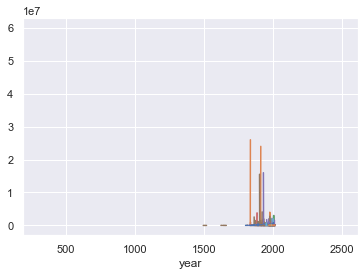

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() #usar estilos de seaborn
data.pivot_table('mass', index='year', columns='recclass', aggfunc='sum').plot(legend=None)

El ejemplo anterior es un ejemplo básico de cómo se puede utilizar tablas pivotes para realizar selecciones rápidas y comparaciones entre las variables. Esta gráfica aún tiene mucho que se le puede mejorar ¿Qué cosas se le pueden cambiar? Utilizando el conocimiento que tienen hasta ahora ¿cómo ayudaría limpiar los datos? ¿cómo podemos limitar los años que se muestran? ¿Cómo seleccionamos un rango de años más pequeño?